In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/thomaskimber/Desktop/Instacart Basket Analysis'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_full.4.9.1.pkl'))

In [5]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_x,avg_price_y,median_days
13100147,17,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,...,0,High-range product,Regularly busy,Most orders,40,Regular customer,High spender,108.648299,108.648299,5.0
13100148,17,Barbara,Chang,Female,Kansas,39,9/16/2018,3,married,150659,...,1,High-range product,Regularly busy,Average orders,40,Regular customer,High spender,108.648299,108.648299,5.0
13100149,135,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635,...,0,High-range product,Regularly busy,Average orders,4,New customer,High spender,1154.792308,1154.792308,12.0
13100150,135,NaN,Chen,Female,Maryland,30,3/19/2017,3,married,120635,...,1,High-range product,Busiest days,Average orders,4,New customer,High spender,1154.792308,1154.792308,12.0
13100151,342,Ruby,Bates,Female,Minnesota,56,8/23/2018,2,married,187328,...,0,High-range product,Busiest days,Average orders,16,Regular customer,High spender,114.426619,114.426619,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,204099,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156,...,0,High-range product,Busiest days,Average orders,39,Regular customer,High spender,1106.743956,1106.743956,4.0
21786877,204099,Gary,Wilson,Male,Washington,48,9/8/2019,3,married,536156,...,1,High-range product,Busiest days,Average orders,39,Regular customer,High spender,1106.743956,1106.743956,4.0
21786878,204395,Shirley,Ellis,Female,Missouri,78,11/9/2019,3,married,137004,...,0,High-range product,Least busiest days,Most orders,15,Regular customer,High spender,451.153540,451.153540,5.0
21786879,205227,Victor,Rivers,Male,Arizona,78,8/9/2018,3,married,294898,...,0,High-range product,Least busiest days,Average orders,12,Regular customer,High spender,1178.381871,1178.381871,12.0


In [6]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [7]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [8]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
np. random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [10]:
big = ords_prods_merge[dev]

In [11]:
small = ords_prods_merge [~dev]

In [12]:
len (ords_prods_merge)

32404859

In [13]:
len (big) + len(small)

32404859

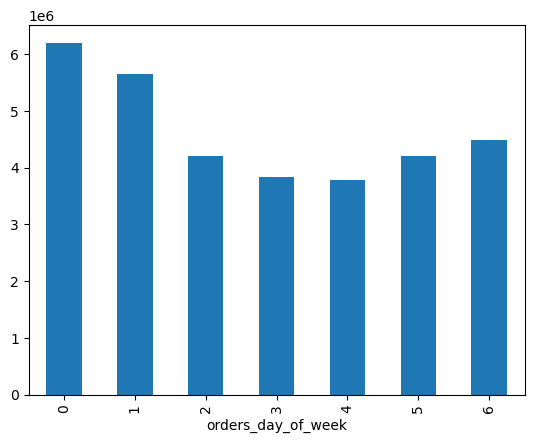

In [14]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

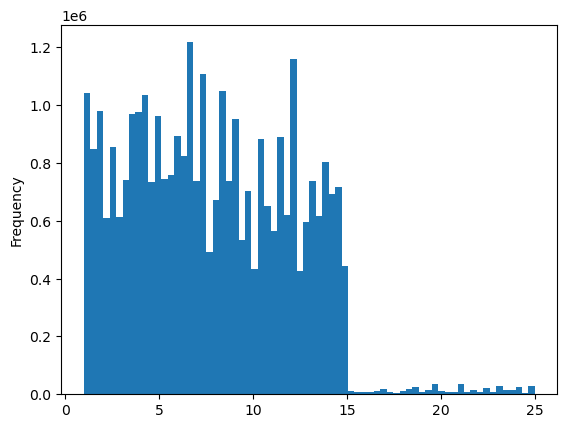

In [15]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [16]:
df_2 = small[['orders_day_of_week','prices']]

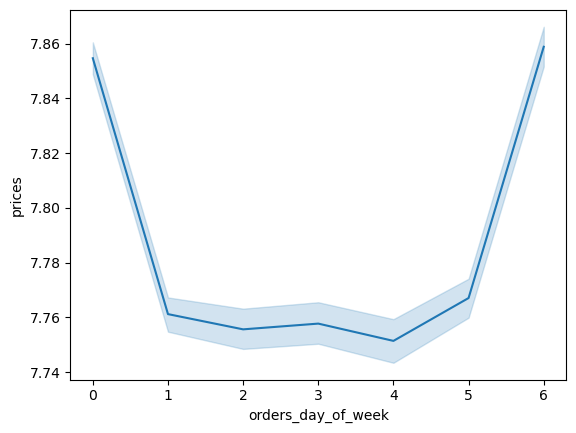

In [17]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## below are the tasks 

In [26]:
#historgram looking at order frequency throughout the day

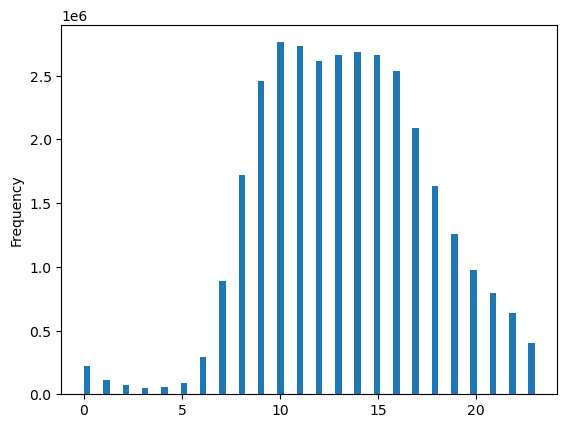

In [18]:
#task 3 
hist = ords_prods_merge['hour_of_the_day_for_order'].plot.hist(bins = 70)

Here we can see a right tail indicating what should be expected, considering most people are asleep during those quiet hours. What's interesting is that the most popular hours are between 10-11 This could show that people are using this to order their lunch, or this is the best time of day for people to do their shopping Either way, this is interesting behaviour worth further analysis 

In [25]:
#bar graph on the number of customer that fall into each loyalty flag

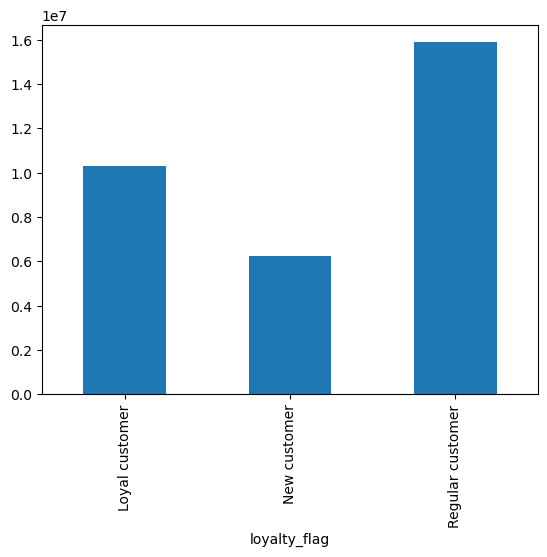

In [19]:

bar = ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

In [21]:
df_3 = small[['hour_of_the_day_for_order','prices']]

In [24]:
#line graph on amount spent during each hour of the day

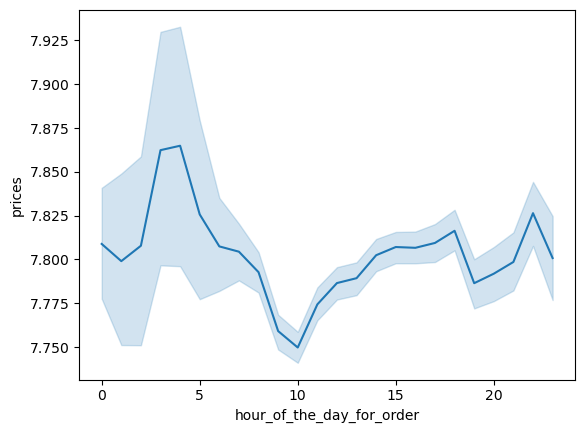

In [23]:
line_2 = sns.lineplot(data = df_3, x = 'hour_of_the_day_for_order',y = 'prices')

In [27]:
df_4 = small[['age','n_dependants']]

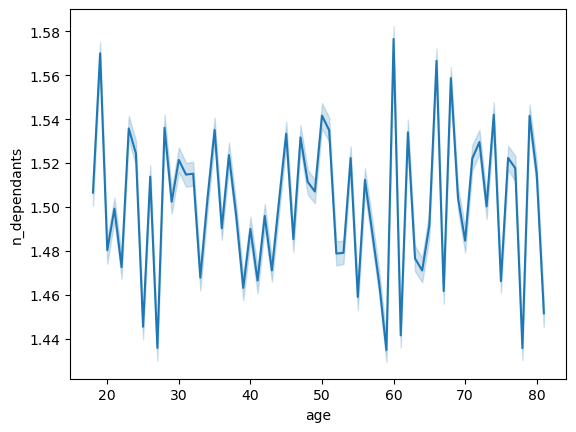

In [28]:
line_3 = sns.lineplot(data = df_4, x = 'age',y = 'n_dependants')

From what I see here is the opposite of what I thought, seeing the spike in 20 and 60, however, this might show that these are young families, potentially single parents or older people now looking after their parents. This might mean that they are more likely to use a service like Instacart to help with their shopping 

In [32]:
df_5 = small[['age','income']]

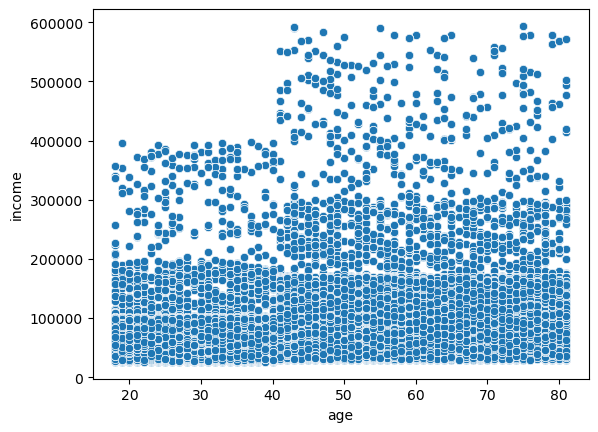

In [34]:
scatter = sns.scatterplot(data = df_5, x = 'age',y = 'income')

In [29]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'line_age_Depend.png'))

In [30]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'line_HOTD_Price.png'))

In [31]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'Bar_Loyalty.png'))

In [35]:
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'scatter_age_income.png'))